# Buiding playgrounds

In this tutorial, we will see how to build playgrounds with differennt rooms, and how to place objects randomly in the playgrounds.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/home/michael/.local/lib/python3.6/site-packages/pymunk/libchipmunk.so]


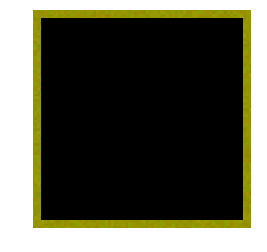

In [2]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine

my_playground = SingleRoom(size=(300, 300))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=10000, playground= my_playground, screen=True)

engine.display_full_scene()

If the initial position of a scene element have to be specified.
Instead of a position, you can define an area where the position will be sampled uniformly.

In [3]:
from simple_playgrounds.entities.scene_elements import Basic
from simple_playgrounds.utils import PositionAreaSampler

area = PositionAreaSampler((50, 50), area_shape='circle', radius=30)
for i in range(10):
    circular_object = Basic(area, physical_shape='circle', radius=5, texture = [120, 230, 0])
    my_playground.add_scene_element_without_overlapping(circular_object)
engine.display_full_scene()

Other possibe shapes are rectangle, or gaussian:

In [4]:
# gaussian area
area = PositionAreaSampler((150, 150), area_shape='gaussian', radius = 80, variance=100)
for i in range(10):
    circular_object = Basic(area, physical_shape='circle', radius=5, texture = [120, 0, 240])
    my_playground.add_scene_element_without_overlapping(circular_object)

area = PositionAreaSampler((150, 50), area_shape='rectangle', width_length=(70, 40))
for i in range(10):
    circular_object = Basic(area, physical_shape='circle', radius=5, texture = [120, 230, 0])
    my_playground.add_scene_element_without_overlapping(circular_object)

engine.display_full_scene()

If we reset the environment, the object appear in different locations.

In [5]:
my_playground.reset()
engine.display_full_scene()

In [6]:
engine.terminate()

Other more advanced playgrounds are available: Linear Rooms and Connected Rooms 2D

In [7]:
from simple_playgrounds.playgrounds import LinearRooms, ConnectedRooms2D
from simple_playgrounds import Engine

my_playground = LinearRooms(size=(400, 200), n_rooms=2, doorstep_type='middle')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()

Once a playground is created, you can access the different doorsteps, and easily add a door.

In [8]:
# Doorstep randomly on the wall
engine.terminate()
my_playground = LinearRooms(size=(400, 200), n_rooms=2, doorstep_type='random')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()
print(my_playground.doorsteps)

{((0, 0), (1, 0)): (200.0, 85.4266163481814, 'vertical')}


In [9]:
# Generate a door for a doorstep
door = my_playground.add_door(((0,0), (1,0)))
engine.display_full_scene()

In [10]:
engine.terminate()
my_playground = ConnectedRooms2D(size=(400, 400), n_rooms=(3,3), doorstep_type='random')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()
print(my_playground.doorsteps)

{((0, 0), (1, 0)): (133.33333333333334, 103.03258076028719, 'vertical'), ((0, 0), (0, 1)): (77.72811912580113, 133.33333333333334, 'horizontal'), ((0, 1), (1, 1)): (133.33333333333334, 188.77701973461075, 'vertical'), ((0, 1), (0, 2)): (97.00749098079952, 266.6666666666667, 'horizontal'), ((0, 2), (1, 2)): (133.33333333333334, 308.3127349223856, 'vertical'), ((1, 0), (2, 0)): (266.6666666666667, 62.672089666953156, 'vertical'), ((1, 0), (1, 1)): (170.3974894956536, 133.33333333333334, 'horizontal'), ((1, 1), (2, 1)): (266.6666666666667, 188.0884482302262, 'vertical'), ((1, 1), (1, 2)): (226.26320222540173, 266.6666666666667, 'horizontal'), ((1, 2), (2, 2)): (266.6666666666667, 344.96220860599055, 'vertical'), ((2, 0), (2, 1)): (346.67014795931067, 133.33333333333334, 'horizontal'), ((2, 1), (2, 2)): (287.58522825714965, 266.6666666666667, 'horizontal')}


Let say that we want an object to always appear in the middle-left room.

In [11]:
position_center, shape = my_playground.area_rooms[(2,1)]
area = PositionAreaSampler(center=position_center, area_shape='rectangle', width_length=shape )
circular_object = Basic(area, physical_shape='circle', radius=5, texture = [120, 230, 0])
my_playground.add_scene_element_without_overlapping(circular_object)

True

In [12]:
my_playground.reset()
engine.display_full_scene()


In [12]:
engine.terminate()

Different wall types are available: classic, light, dark, colorful.
Nothing prevents you from creating your own using wall_texture.

In [14]:
my_playground = SingleRoom(size=(300, 300), wall_type='light')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()

In [15]:
engine.terminate()
my_playground = SingleRoom(size=(300, 300), wall_type='dark')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()

In [16]:
engine.terminate()
my_playground = SingleRoom(size=(300, 300), wall_type='colorful')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()

In [17]:
engine.terminate()
my_playground = ConnectedRooms2D(size=(600, 600), n_rooms=(4,4), wall_type='colorful')
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.display_full_scene()